### Import the dependencies

In [184]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Store CSV into DataFrame

In [2]:
csv_file = "./Resources/tmdb_5000_credits.csv"
movie_credit_df = pd.read_csv(csv_file)

In [3]:
csv_file = "./Resources/tmdb_5000_movies.csv"
movie_tmdb_df = pd.read_csv(csv_file)

### Create new data with selected columns

In [4]:
new_movie_tmdb_df = movie_tmdb_df[['title','budget','revenue','vote_average','vote_count']].copy()

### Clean dataframe

In [5]:
new_movie_tmdb_df = new_movie_tmdb_df[(new_movie_tmdb_df != 0).all(1)]
new_movie_tmdb_df = new_movie_tmdb_df.reset_index(drop = True)
new_movie_tmdb_df['id'] = new_movie_tmdb_df.index
new_movie_tmdb_df.head()

,title,budget,revenue,vote_average,vote_count,id
0,Avatar,237000000,2787965087,7.2,11800,0
1,Pirates of the Caribbean: At World's End,300000000,961000000,6.9,4500,1
2,Spectre,245000000,880674609,6.3,4466,2
3,The Dark Knight Rises,250000000,1084939099,7.6,9106,3
4,John Carter,260000000,284139100,6.1,2124,4


In [6]:
csv_file = "./Resources/all_movie.csv"
all_movie_df = pd.read_csv(csv_file)
new_all_movie_df = all_movie_df[['Title','Studio']].copy()
new_all_movie_df = new_all_movie_df.rename(columns={"Studio": "studio"})
new_all_movie_df = new_all_movie_df.dropna(how='any')
new_all_movie_df = new_all_movie_df.reset_index(drop = True)
new_all_movie_df['id'] = new_all_movie_df.index
new_all_movie_df = new_all_movie_df.rename(columns={"Title": "mov_title"})
new_all_movie_df.head()

,mov_title,studio,id
0,The Mummy: Tomb of the Dragon Emperor,Universal Pictures,0
1,The Masked Saint,Freestyle Releasing,1
2,Spy Hard,Hollywood Pictures,2
3,Der Baader Meinhof Komplex (The Baader Meinhof...,Vitagraph Films,3
4,Apocalypse Now,United Artists,4


In [162]:
csv_file = "./Resources/movie_metadata.csv"
meta_data_df = pd.read_csv(csv_file)
new_meta_data_df = meta_data_df[['movie_title','director_name','duration','genres','country','language','title_year',
                                'imdb_score','facenumber_in_poster','cast_total_facebook_likes','actor_1_facebook_likes',
                                'actor_2_facebook_likes','actor_3_facebook_likes']]
new_meta_data_df = new_meta_data_df.dropna(how = 'any')
new_meta_data_df['movie_title'].str[:-1]
new_meta_data_df['movie_title'] = new_meta_data_df['movie_title'].str.strip()
new_meta_data_df = new_meta_data_df.reset_index(drop = True)
new_meta_data_df['id'] = new_meta_data_df.index
new_meta_data_df.drop_duplicates(keep='first',inplace=True) 

In [437]:
new_meta_data_df.head()

,movie_title,director_name,duration,genres,country,language,title_year,imdb_score,facenumber_in_poster,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,id
0,Avatar,James Cameron,178.0,Action|Adventure|Fantasy|Sci-Fi,USA,English,2009.0,7.9,0.0,4834,1000.0,936.0,855.0,0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,169.0,Action|Adventure|Fantasy,USA,English,2007.0,7.1,0.0,48350,40000.0,5000.0,1000.0,1
2,Spectre,Sam Mendes,148.0,Action|Adventure|Thriller,UK,English,2015.0,6.8,1.0,11700,11000.0,393.0,161.0,2
3,The Dark Knight Rises,Christopher Nolan,164.0,Action|Thriller,USA,English,2012.0,8.5,0.0,106759,27000.0,23000.0,23000.0,3
4,John Carter,Andrew Stanton,132.0,Action|Adventure|Sci-Fi,USA,English,2012.0,6.6,1.0,1873,640.0,632.0,530.0,4


In [9]:
csv_file = "./Resources/Top 250 directors by IMDB rating.csv"
director_df = pd.read_csv(csv_file, encoding = "ISO-8859-1")
director_df.head()

,Position,Const,Created,Modified,Description,Name,Known For,Birth Date
0,1,nm0251027,2014-09-17,2014-09-17,NaN,Ertem Egilmez,Kalbimin efendisi,1929-02-18
1,2,nm0000041,2014-09-17,2014-09-17,NaN,Akira Kurosawa,Kakushi-toride no san-akunin,1910-03-23
2,3,nm0000033,2014-09-17,2014-09-17,NaN,Alfred Hitchcock,Psycho,1899-08-13
3,4,nm0000005,2014-09-17,2014-09-17,NaN,Ingmar Bergman,Smultronstället,1918-07-14
4,5,nm0000229,2014-09-17,2014-09-17,NaN,Steven Spielberg,Schindler's List,1946-12-18


In [10]:
new_director_df = director_df[['Position','Name']]
new_director_df = new_director_df.rename(columns={"Position": "position", "Name": "name"})
new_director_df = new_director_df.dropna(how = 'any')
new_director_df = new_director_df.reset_index(drop = True)
new_director_df['id'] = new_director_df.index
new_director_df.head()

,position,name,id
0,1,Ertem Egilmez,0
1,2,Akira Kurosawa,1
2,3,Alfred Hitchcock,2
3,4,Ingmar Bergman,3
4,5,Steven Spielberg,4


In [11]:
excel_file = "./Resources/movie_genre.xlsx"
genre_df = pd.read_excel(excel_file)
new_genre_df = genre_df[['movie_title','genres','id']]
new_genre_df.head()

,movie_title,genres,id
0,Avatar,Action,1
1,Pirates of the Caribbean: At World's End,Action,2
2,Spectre,Action,3
3,The Dark Knight Rises,Action,4
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,5


###  Connect to local database

In [13]:
rds_connection_string = "postgres:<your password>@localhost:5432/Movie_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

### Check for tables

In [14]:
engine.table_names()

['movie_budget',
 'director_likes',
 'movie_info',
 'movie_studio',
 'movie_genres']

### Loaded csv converted DataFrame into database using Pandas

In [27]:
new_movie_tmdb_df.to_sql(name='movie_budget', con=engine, if_exists='append', index=False)

In [172]:
new_meta_data_df.to_sql(name='movie_info', con=engine, if_exists='append', index=False)

In [ ]:
new_director_df.to_sql(name = 'director_likes', con=engine, if_exists ='append', index = False)

In [29]:
new_all_movie_df.to_sql(name = 'movie_studio', con=engine, if_exists ='append', index = False)

In [30]:
new_genre_df.to_sql(name = 'movie_genres', con=engine, if_exists ='append', index = False)

### Run the query 

In [176]:
actor_like_pd = pd.read_sql_query("""select i.actor_1_facebook_likes, b.revenue
from movie_info i
join movie_budget b on b.title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' """, con=engine)

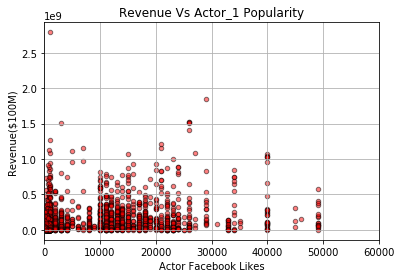

In [329]:
actor_like_pd.plot(kind="scatter", x="actor_1_facebook_likes", y="revenue", alpha=0.5,color = 'r',edgecolor="black")
plt.grid()
plt.title("Revenue Vs Actor_1 Popularity")
plt.xlabel("Actor Facebook Likes")
plt.ylabel("Revenue($100M)")
plt.xlim(0,60000,10000)
plt.savefig("Revenue vs Actor1_popularity")

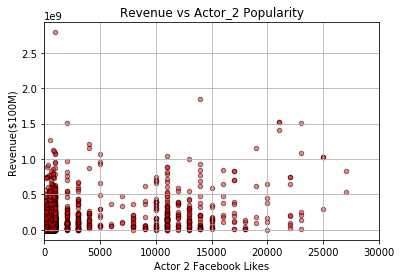

In [330]:
actor2_like_pd = pd.read_sql_query("""select i.actor_2_facebook_likes, b.revenue
from movie_info i
join movie_budget b on b.title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' """, con=engine)
actor2_like_pd.plot(kind="scatter", x="actor_2_facebook_likes", y="revenue", alpha=0.5,color = 'r',edgecolor="black")
plt.grid()
plt.title("Revenue vs Actor_2 Popularity")
plt.xlabel("Actor 2 Facebook Likes")
plt.ylabel("Revenue($100M)")
plt.xlim(0,30000,10000)
plt.savefig("Revenue vs Actor2_popularity")

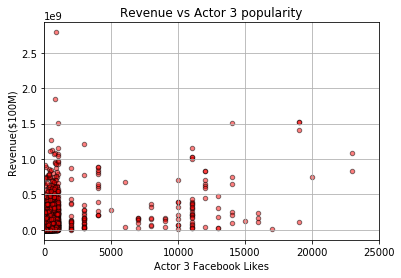

In [331]:
actor3_like_pd = pd.read_sql_query("""select i.actor_3_facebook_likes, b.revenue
from movie_info i
join movie_budget b on b.title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' """, con=engine)
actor3_like_pd.plot(kind="scatter", x="actor_3_facebook_likes", y="revenue", alpha=0.5,color = 'r',edgecolor="black")
plt.grid()
plt.title("Revenue vs Actor 3 popularity")
plt.xlabel("Actor 3 Facebook Likes")
plt.ylabel("Revenue($100M)")
plt.xlim(0,25000,10000)
plt.savefig("Revenue vs Actor3_popularity")

In [295]:
from scipy import stats
stats.spearmanr(actor_like_pd['actor_1_facebook_likes'], actor_like_pd['revenue'])

SpearmanrResult(correlation=0.2645057177735452, pvalue=1.184803709386054e-34)

In [297]:
from scipy import stats
stats.spearmanr(actor2_like_pd['actor_2_facebook_likes'], actor_like_pd['revenue'])

SpearmanrResult(correlation=0.20716936802409386, pvalue=1.3127995388232542e-21)

In [298]:
from scipy import stats
stats.spearmanr(actor3_like_pd['actor_3_facebook_likes'], actor_like_pd['revenue'])

SpearmanrResult(correlation=0.1717004222988497, pvalue=3.106395456855082e-15)

In [180]:
cast_like_pd = pd.read_sql_query("""select i.movie_title , i.cast_total_facebook_likes, b.revenue
from movie_info i
join movie_budget b on b.title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' """, con=engine)

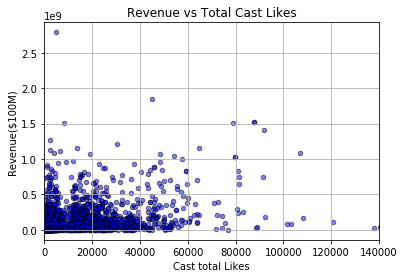

In [332]:
cast_like_pd.plot(kind="scatter", x="cast_total_facebook_likes", y="revenue", alpha=0.5,color = 'blue',edgecolor="black")
plt.grid()
plt.title("Revenue vs Total Cast Likes")
plt.xlabel("Cast total Likes")
plt.ylabel("Revenue($100M)")
plt.xlim(0,140000,10000)
plt.savefig("Revenue vs Total Cast Likes")

In [33]:
from scipy import stats
stats.spearmanr(cast_like_pd['cast_total_facebook_likes'], cast_like_pd['revenue'])

SpearmanrResult(correlation=0.29320835905438597, pvalue=1.4196143115111869e-42)

In [34]:
# Run the query to get Revenue and Vote_average
rev_pd = pd.read_sql_query("""select b.revenue, b.vote_average ,i.movie_title from movie_budget b\
                           join movie_info i on b.title = i.movie_title \
                           where i.country = 'USA' and i.language = 'English' and i.title_year > 1995 """, con=engine)

### Plot the data

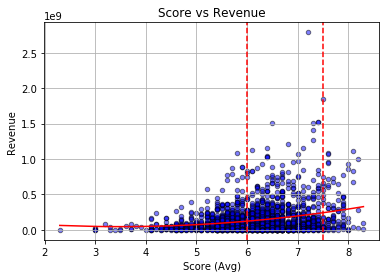

In [303]:
# Plot the graph of Revenue and Vote_average
rev_pd.plot(kind="scatter", x="vote_average", y="revenue", alpha=0.5,color = 'blue',edgecolor="black")
plt.grid()
plt.title("Score vs Revenue")
plt.xlabel("Score (Avg)")
plt.ylabel("Revenue")
plt.axvline(x=6, ls='dashed', color ='r')
plt.axvline(x=7.5, ls='dashed', color ='r')
plt.plot(np.unique(rev_pd['vote_average']), 
         np.poly1d(np.polyfit(rev_pd['vote_average'], rev_pd['revenue'], 
                              deg=2))(np.unique(rev_pd['vote_average'])),color='r')

In [36]:
from scipy import stats
stats.spearmanr(rev_pd['vote_average'], rev_pd['revenue'])

SpearmanrResult(correlation=0.19075547984416907, pvalue=1.6118334617287055e-18)

In [304]:
# Query to get revenue and budget
rev_bud_pd = pd.read_sql_query("""select b.revenue, b.budget ,i.movie_title from movie_budget b\
                           join movie_info i on b.title = i.movie_title \
                           where i.country = 'USA' and i.language = 'English' and i.title_year > 1995 """, con=engine)

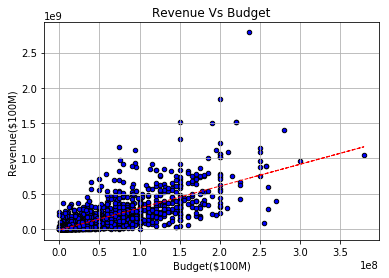

In [333]:
rev_bud_pd.plot(kind="scatter", x="budget", y="revenue", alpha=1,color = 'blue',edgecolor="black")
plt.grid()
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(
    rev_bud_pd['budget'], rev_bud_pd['revenue'])
vc_fit = vc_slope * rev_bud_pd['budget'] + vc_int

plt.plot(rev_bud_pd['budget'], vc_fit, "r--", linewidth=1)
plt.title('Revenue Vs Budget')
plt.ylabel('Revenue($100M)')
plt.xlabel('Budget($100M)')
plt.savefig("Revenue vs Budget")

In [436]:
stats.linregress( rev_bud_pd['budget'], rev_bud_pd['revenue'])

LinregressResult(slope=3.097338481914625, intercept=-12880137.171025097, rvalue=0.7248182366959008, pvalue=0.0, stderr=0.06456747515835934)

In [40]:
# query to get Revenue of the movies per year
revenue = pd.read_sql_query("""select i.title_year, sum(b.revenue) as "Total Revenue" \
from movie_budget b \
join movie_info i on b.title = i.movie_title \
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' \
group by i.title_year \
order by i.title_year """, con=engine)

Text(0.5, 0, 'Year')

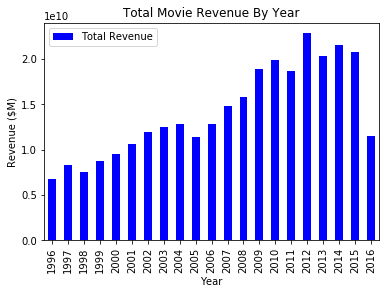

In [41]:
revenue.plot(kind="bar", x="title_year", y="Total Revenue", alpha=1,color = 'b')
plt.title("Total Movie Revenue By Year")
plt.ylabel("Revenue ($M)")
plt.xlabel("Year")


In [44]:
budget = pd.read_sql_query("""select i.title_year, sum(b.budget) as "Total Budget" \
from movie_budget b \
join movie_info i on b.title = i.movie_title \
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' \
group by i.title_year \
order by i.title_year """, con=engine)

Text(0.5, 0, 'Year')

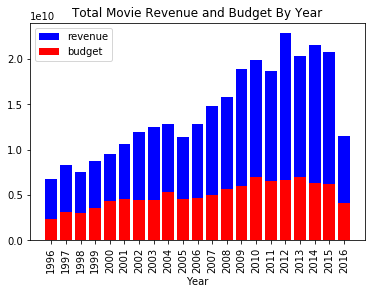

In [45]:
p1 = plt.bar(revenue['title_year'],revenue['Total Revenue'],alpha=1,color = 'b')
p2 = plt.bar(budget['title_year'],budget['Total Budget'],alpha=1,color = 'r')
plt.legend((p1[0], p2[0]), ('revenue', 'budget'))
plt.title("Total Movie Revenue and Budget By Year")
tick_locations = revenue['title_year']
plt.xticks(tick_locations, revenue['title_year'], rotation='vertical')
plt.xlabel("Year")


Text(0.5, 0, 'Year')

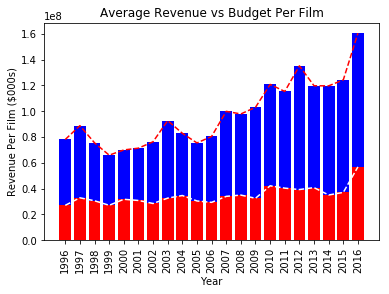

In [46]:
revenue_per_film = revenue['Total Revenue']/movie['Total Movie']
budget_per_film = budget['Total Budget']/movie['Total Movie']
plt.bar(revenue['title_year'], revenue_per_film, color = "b",alpha = 1)
plt.bar(budget['title_year'], budget_per_film, color = "r", alpha = 1)
plt.plot(budget['title_year'],revenue_per_film, label='Mean', linestyle='--',color = 'r')
plt.plot(budget['title_year'],budget_per_film, label='Mean', linestyle='--',color = 'w')
tick_locations = revenue['title_year']
plt.xticks(tick_locations, revenue['title_year'], rotation='vertical')
plt.title("Average Revenue vs Budget Per Film")
plt.ylabel("Revenue Per Film ($000s)")
plt.xlabel("Year")

In [49]:
duration = pd.read_sql_query("""select i.duration , b.revenue
from movie_info i
join movie_budget b on b.title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English'
""", con=engine)

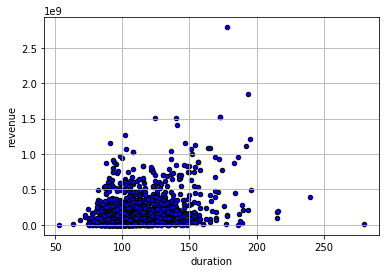

In [50]:
duration.plot(kind="scatter", x="duration", y="revenue", alpha=1,color = 'blue',edgecolor="black")
plt.grid()

In [51]:
duration_score = pd.read_sql_query("""select i.duration , b.vote_average
from movie_info i
join movie_budget b on b.title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English'
""", con=engine)

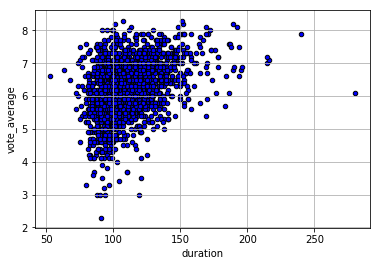

In [52]:
duration_score.plot(kind= 'scatter', x = "duration" , y = "vote_average",alpha=1,color = 'blue',edgecolor="black")
plt.grid()

In [53]:
budget_score = pd.read_sql_query("""select b.budget , b.vote_average
from movie_budget b
join movie_info i on b.title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English'
""", con=engine)

Text(0.5, 1.0, 'Budget vs Score By Movie')

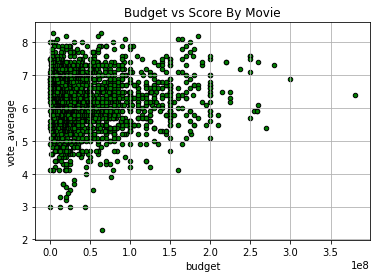

In [54]:
budget_score.plot(kind= 'scatter', x = "budget" , y = "vote_average",alpha=1,color = 'green',edgecolor="black")
plt.grid()
plt.title("Budget vs Score By Movie")

In [55]:
final_db  = pd.read_sql_query("""select b.budget , b.revenue , b.vote_average , i.duration , i.imdb_score , 
i.facenumber_in_poster,i.cast_total_facebook_likes
from movie_info i
join movie_budget b on b.title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English'
""", con=engine)

In [56]:
# Create co-relation Matrix considering Revenue is our dependent varibale

corr_matrix = final_db.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue                      1.000000
budget                       0.724897
duration                     0.318304
vote_average                 0.242964
imdb_score                   0.242035
cast_total_facebook_likes    0.210624
facenumber_in_poster        -0.040562
Name: revenue, dtype: float64

In [57]:
# Create co-relation Matrix considering vote_Average is our dependent varibale

corr_matrix = final_db.corr()
corr_matrix["vote_average"].sort_values(ascending=False)

vote_average                 1.000000
imdb_score                   0.928849
duration                     0.369663
revenue                      0.242964
cast_total_facebook_likes    0.125246
budget                       0.072231
facenumber_in_poster        -0.079950
Name: vote_average, dtype: float64

In [58]:
# run several sql queries to get studios revenue and years from the tables

centuary_db  = pd.read_sql_query("""select sum(b.revenue) as "centuary_sum", i.title_year
from movie_studio s
inner join movie_info i on s.mov_title = i.movie_title
inner join movie_budget b on i.movie_title = b.title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' and s.studio = '20th Century Fox'
group by i.title_year
order by i.title_year
""", con=engine)

warner_db  = pd.read_sql_query("""select sum(b.revenue) as "warner_sum", i.title_year
from movie_studio s
inner join movie_info i on s.mov_title = i.movie_title
inner join movie_budget b on i.movie_title = b.title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' and s.studio = 'Warner Bros. Pictures'
group by i.title_year
order by i.title_year
""", con=engine)

universal_db  = pd.read_sql_query("""select sum(b.revenue) as "universal_sum", i.title_year
from movie_studio s
inner join movie_info i on s.mov_title = i.movie_title
inner join movie_budget b on i.movie_title = b.title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' and s.studio = 'Universal Pictures'
group by i.title_year
order by i.title_year
""", con=engine)

walt_db  = pd.read_sql_query("""select sum(b.revenue) as "walt_sum", i.title_year
from movie_studio s
inner join movie_info i on s.mov_title = i.movie_title
inner join movie_budget b on i.movie_title = b.title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' and s.studio = 'Walt Disney Pictures'
group by i.title_year
order by i.title_year
""", con=engine)

para_db  = pd.read_sql_query("""select sum(b.revenue) as "para_sum", i.title_year
from movie_studio s
inner join movie_info i on s.mov_title = i.movie_title
inner join movie_budget b on i.movie_title = b.title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' and s.studio = 'Paramount Pictures'
group by i.title_year
order by i.title_year
""", con=engine)

sony_db  = pd.read_sql_query("""select sum(b.revenue) as "sony_sum", i.title_year
from movie_studio s
inner join movie_info i on s.mov_title = i.movie_title
inner join movie_budget b on i.movie_title = b.title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English' and s.studio = 'Sony Pictures'
group by i.title_year
order by i.title_year
""", con=engine)





In [59]:
first = pd.merge(centuary_db, warner_db, on = 'title_year',how='outer')
second = pd.merge(universal_db, first, on = 'title_year',how='outer')
third = pd.merge(walt_db, second, on = 'title_year')
fourth = pd.merge(para_db, third, on = 'title_year')
final = pd.merge(sony_db, fourth, on = 'title_year')

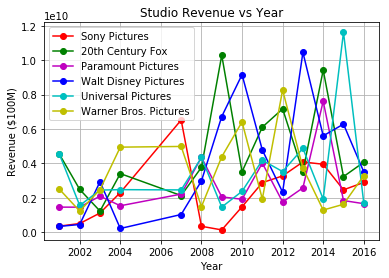

In [334]:
# Plot the data

plt.plot(final['title_year'],final['sony_sum'],color = 'r',marker ='o',label="Sony Pictures")
plt.plot(final['title_year'],final['centuary_sum'],color = 'g',marker ='o',label="20th Century Fox")
plt.plot(final['title_year'],final['para_sum'],color = 'm',marker ='o',label="Paramount Pictures")
plt.plot(final['title_year'],final['walt_sum'],color = 'b',marker ='o',label="Walt Disney Pictures")
plt.plot(final['title_year'],final['universal_sum'],color = 'c',marker ='o',label="Universal Pictures")
plt.plot(final['title_year'],final['warner_sum'],color = 'y',marker ='o',label = 'Warner Bros. Pictures')
plt.legend(loc="upper left")
plt.xlabel('Year')
plt.ylabel('Revenue ($100M)')
plt.title('Studio Revenue vs Year')
plt.grid()
plt.savefig("Studio Revenue vs Year")

In [427]:
# Run the query to get the data

genre_db  = pd.read_sql_query("""select i.title_year, gn.genres , avg(b.revenue)  as "Average Revenue" 
from movie_info i
join movie_budget b on b.title = i.movie_title
join movie_genres gn on gn.movie_title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English'
group by gn.genres,i.title_year
order by i.title_year
""", con=engine)

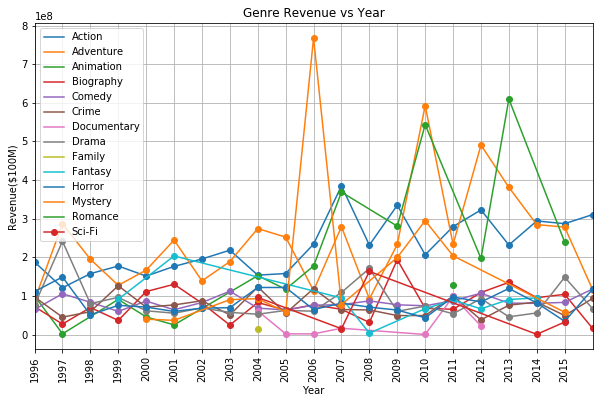

In [435]:
#Plot the data

fig, ax = plt.subplots(figsize=(10,6))

for name, group in genre_db.groupby('genres'):
    group.plot(x='title_year', y='Average Revenue', marker ='o' ,ax=ax, label=name)

year = ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
       '2011','2012','2013','2014','2015','2016']
plt.xticks(tick_locations, year, rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Revenue($100M)')
plt.title('Genre Revenue vs Year')
plt.savefig('Genre Revenue vs Year')


In [433]:
# Run the query

genre_budget  = pd.read_sql_query("""select i.title_year, gn.genres , sum(b.budget)  as "Total Budget" 
from movie_info i
join movie_budget b on b.title = i.movie_title
join movie_genres gn on gn.movie_title = i.movie_title
where i.title_year > 1995 and i.country = 'USA' and i.language = 'English'
group by gn.genres,i.title_year
order by i.title_year
""", con=engine)

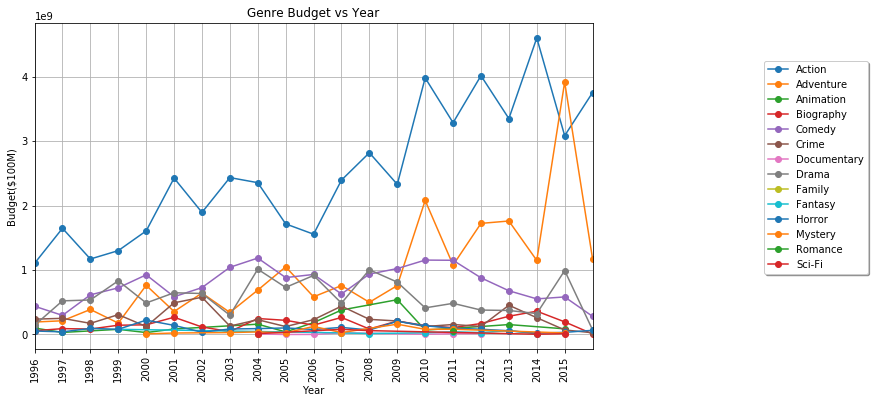

In [434]:
# Plot the data

fig, ax = plt.subplots(figsize=(10,6))

for name, group in genre_budget.groupby('genres'):
    group.plot(x='title_year', y='Total Budget', marker ='o' ,ax=ax, label=name)

year = ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
       '2011','2012','2013','2014','2015','2016']
plt.xticks(tick_locations, year, rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Budget($100M)')
plt.title('Genre Budget vs Year')
plt.savefig('Genre Budget vs Year')
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=1)

In [129]:
# Run the query

total_movie_db  = pd.read_sql_query("""select title_year, count(movie_title)  as "Total Movies" 
from movie_info 
where title_year > 1995 and title_year < 2016 and country = 'USA' and language = 'English'
group by title_year
order by title_year
""", con=engine)

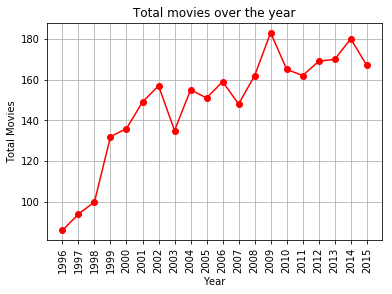

In [311]:
#Plot the data
plt.plot(total_movie_db['title_year'], total_movie_db['Total Movies'], marker ='o' ,color = 'r' , alpha = 1)
tick_locations = [value for value in total_movie_db['title_year']]
plt.xticks(tick_locations, ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
       '2011','2012','2013','2014','2015'], rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Total Movies')
plt.title('Total movies over the year')
plt.savefig('Total Movies')

In [391]:
csv_file = "./Resources/blockbuster.xlsx"
movie_rating_df = pd.read_excel(csv_file)
new_movie_rating_df = movie_rating_df.reset_index(drop = True)
new_movie_rating_df['id'] = movie_rating_df.index
new_movie_rating_df.drop_duplicates(keep='first',inplace=True) 
new_movie_rating_df.head()

,audience_freshness,rt_audience_score,rt_freshness,rt_score,adjusted,genres,imdb_rating,rating,studio,title,year,id
0,92,4.3,89,7.5,7.129037e+08,Sci-Fi,7.8,PG-13,Marvel Studios,Captain America: The Winter Soldier,2014,0
1,89,4.2,90,7.9,7.069882e+08,Sci-Fi,7.7,PG-13,20th Century Fox,Dawn of the Planet of the Apes,2014,1
2,93,4.4,91,7.7,7.721589e+08,Sci-Fi,8.1,PG-13,Marvel Studios,Guardians of the Galaxy,2014,2
3,86,4.2,72,7.0,6.712205e+08,Sci-Fi,8.7,PG-13,Paramount Pictures / Warner Bros.,Interstellar,2014,3
4,71,3.8,49,5.7,7.566777e+08,Family,7.1,PG,Walt Disney Pictures,Maleficent,2014,4


In [392]:
new_movie_rating_df.to_sql(name = 'movie_ratings', con=engine, if_exists ='append', index = False)

In [393]:

db1  = pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings 
where genres = 'Sci-Fi' 
""", con=engine)
db2 = pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings
where genres = 'Adventure' 
""", con=engine)
db3 = pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings 
where genres = 'Drama' 
""", con=engine)
db4= pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings
where genres = 'Comedy' 
""", con=engine)
db5= pd.read_sql_query("""select genres ,imdb_rating, rt_score
from movie_ratings
where genres = 'Animation' 
""", con=engine)
db6= pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings
where genres = 'Fantasy' 
""", con=engine)
db7= pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings
where genres = 'Thriller' 
""", con=engine)
db8= pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings
where genres = 'Romance' 
""", con=engine)
db9= pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings
where genres = 'Action' 
""", con=engine)
db10= pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings
where genres = 'Musical' 
""", con=engine)
db11= pd.read_sql_query("""select genres , imdb_rating, rt_score
from movie_ratings
where genres = 'Family' 
""", con=engine)

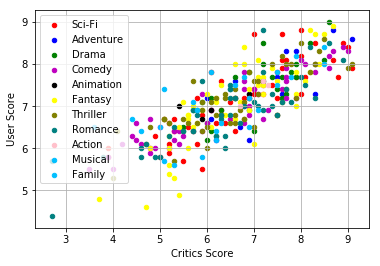

In [394]:
#Plot the scatter plot for rating vs genres 

ax = db1.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'r',label = 'Sci-Fi')
db2.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'b',ax = ax , label = 'Adventure')
db3.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'g',ax = ax , label = 'Drama')
db4.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'm',ax = ax , label = 'Comedy')
db5.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'k',ax = ax , label = 'Animation')
db6.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'yellow',ax = ax , label = 'Fantasy')
db7.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'olive',ax = ax , label = 'Thriller')
db8.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'teal',ax = ax , label = 'Romance')
db9.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'pink',ax = ax , label = 'Action')
db10.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'deepskyblue',ax = ax , label = 'Musical')
db11.plot(kind = 'scatter', x = 'rt_score', y = 'imdb_rating', c= 'deepskyblue',ax = ax , label = 'Family')
plt.xlabel('Critics Score')
plt.ylabel('User Score')
plt.grid()

In [395]:
genre_rating  = pd.read_sql_query("""select genres , avg(imdb_rating) as "Average User rating", avg(rt_score) as "Average Critics Rating"
from movie_ratings 
group by genres
""", con=engine)

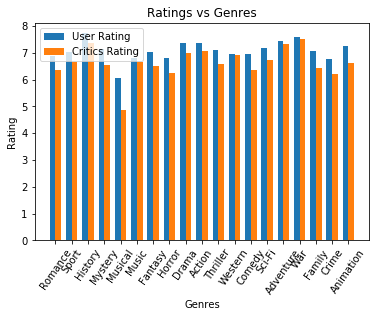

In [421]:
#Plot the data
N = 19

ind = np.arange(N) 
width = 0.35       
plt.bar(ind,genre_rating['Average User rating'] , width, label='User Rating')
plt.bar(ind + width, genre_rating['Average Critics Rating'] , width,label='Critics Rating')

plt.xticks(ind + width / 2, genre_rating['genres'],rotation = '55')
plt.legend(loc='best')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.title('Ratings vs Genres')
plt.savefig('ratings vs genres')
plt.show()

In [408]:
rated_rating  = pd.read_sql_query("""select rating , avg(imdb_rating) as "Average User rating", avg(rt_score) as "Average Critics Rating"
from movie_ratings 
group by rating
""", con=engine)

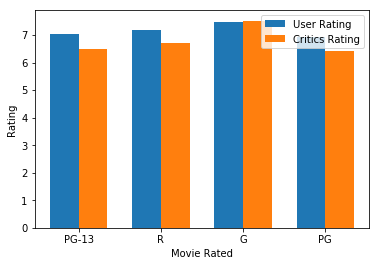

In [417]:
N = 4

ind = np.arange(N) 
width = 0.35       
plt.bar(ind,rated_rating['Average User rating'] , width, label='User Rating')
plt.bar(ind + width, rated_rating['Average Critics Rating'] , width,label='Critics Rating')



plt.xticks(ind + width / 2, rated_rating['rating'])
plt.legend(loc='best')
plt.xlabel('Movie Rated')
plt.ylabel('Rating')
plt.savefig('ratings')

plt.show()